# Packages

In [131]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Data

In [132]:
data_cleaned = pd.read_csv(r'C:\Users\natal\Github\Death-Prediction-Analysis-Congenital-Syphilis\data\clean_data.csv', encoding='latin1')

C:\Users\natal\AppData\Local\Temp\ipykernel_43392\2270981868.py:1: DtypeWarning: Columns (14,19,36,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cleaned = pd.read_csv(r'C:\Users\natal\Github\Death-Prediction-Analysis-Congenital-Syphilis\data\clean_data.csv', encoding='latin1')


In [133]:
data_cleaned.head()

,Unnamed: 0,tp_not,sem_not,id_agravo,dt_notific,nu_ano,sg_uf_not,id_municip,id_regiona,dt_diag,...,cli_icteri,cli_rinite,cli_anemia,cli_esplen,hepato,cli_osteo,lesoes,cli_outro,sin_outr_e,cli_pseudo
0,1,2,201334.0,A509,2013-08-22,2013,42,420395,1555.0,2007-12-01,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,ENCEFALOPATIA,2.0
1,2,2,1307.0,A509,2013-02-15,2013,33,330510,NaN,2008-10-31,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0
2,3,2,201326.0,A509,2013-06-24,2013,33,330350,NaN,2009-04-21,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0
3,4,2,201315.0,A509,2013-04-08,2013,24,240810,1416.0,2010-04-24,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0
4,5,2,201323.0,A509,2013-06-06,2013,33,330350,NaN,2010-07-31,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0


In [134]:
data_cleaned.shape

(251659, 65)

In [135]:
data_cleaned.columns = data_cleaned.columns.str.upper()

In [136]:
# Create outcome columns (death from congenital syphilis) based on EVOLUCAO
data_cleaned['OBITO_SIFILIS'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 2 else 0)


In [137]:
data_cleaned.shape

(251659, 66)

# Data cleaning

In [138]:
# Step 1: Remove all columns representing date
# Identify columns that begin with 'DT'
columns_with_dt = [col for col in data_cleaned.columns if col.startswith('DT')]

data_cleaned = data_cleaned.drop(columns=columns_with_dt)

print("Removed columns that begin with 'DT':", columns_with_dt)
print("Remaining columns in the dataset:", data_cleaned.columns)

Removed columns that begin with 'DT': ['DT_NOTIFIC', 'DT_DIAG', 'DT_OBITO']
Remaining columns in the dataset: Index(['UNNAMED: 0', 'TP_NOT', 'SEM_NOT', 'ID_AGRAVO', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'SEM_DIAG', 'NU_IDADE_N', 'CS_SEXO',
       'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'ANT_IDADE', 'ANT_RACA', 'ID_OCUPA_N',
       'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT', 'MUN_PRE_NA', 'ANTSIFIL_N',
       'LAB_PARTO', 'LAB_TITU_2', 'LAB_DT3', 'LAB_CONF', 'TRA_ESQUEM',
       'TRA_DT', 'ANT_TRATAD', 'ANT_UF_CRI', 'ANT_MUNI_C', 'LABC_SANGU',
       'LABC_TIT_1', 'LABC_DT_1', 'LABC_IGG', 'LABC_DT', 'LABC_LIQUO',
       'LABC_TIT_2', 'LABC_DT_2', 'LABC_TITUL', 'LABC_EVIDE', 'LABC_LIQ_1',
       'TRA_DIAG_T', 'TRA_ESQU_1', 'DS_ESQUEMA', 'EVOLUCAO', 'EVO_DIAG_N',
       'TRA_DIAG_C', 'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN',
       'HEPATO', 'CLI_OSTEO', 'LESOES', 'CLI_OUTRO', 'SIN_OUTR_E',
       'CLI_PSE

In [139]:
# Step 2: Remove columns representing laboratory data because they will certainly be related to the outcome
# Identify columns that begin with 'LAB'
columns_with_lab = [col for col in data_cleaned.columns if col.startswith('LAB')]

data_cleaned = data_cleaned.drop(columns=columns_with_lab)

print("Removed columns that begin with 'LAB':", columns_with_lab)
print("Remaining columns in the dataset:", data_cleaned.columns)

Removed columns that begin with 'LAB': ['LAB_PARTO', 'LAB_TITU_2', 'LAB_DT3', 'LAB_CONF', 'LABC_SANGU', 'LABC_TIT_1', 'LABC_DT_1', 'LABC_IGG', 'LABC_DT', 'LABC_LIQUO', 'LABC_TIT_2', 'LABC_DT_2', 'LABC_TITUL', 'LABC_EVIDE', 'LABC_LIQ_1']
Remaining columns in the dataset: Index(['UNNAMED: 0', 'TP_NOT', 'SEM_NOT', 'ID_AGRAVO', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'SEM_DIAG', 'NU_IDADE_N', 'CS_SEXO',
       'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'ANT_IDADE', 'ANT_RACA', 'ID_OCUPA_N',
       'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT', 'MUN_PRE_NA', 'ANTSIFIL_N',
       'TRA_ESQUEM', 'TRA_DT', 'ANT_TRATAD', 'ANT_UF_CRI', 'ANT_MUNI_C',
       'TRA_DIAG_T', 'TRA_ESQU_1', 'DS_ESQUEMA', 'EVOLUCAO', 'EVO_DIAG_N',
       'TRA_DIAG_C', 'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN',
       'HEPATO', 'CLI_OSTEO', 'LESOES', 'CLI_OUTRO', 'SIN_OUTR_E',
       'CLI_PSEUDO', 'OBITO_SIFILIS'],
      dtype='object')


In [140]:
# Step 3: Remove columns that start with 'ID'
# Columns that start with "ID"

id_columns = [col for col in data_cleaned.columns if col.startswith('ID')]
print("Columns that start with 'ID':", id_columns)

data_cleaned = data_cleaned.drop(columns=id_columns)

print("Columns remaining in the dataset after removing columns that start with 'ID':")
print(data_cleaned.columns)

Columns that start with 'ID': ['ID_AGRAVO', 'ID_MUNICIP', 'ID_REGIONA', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'ID_OCUPA_N']
Columns remaining in the dataset after removing columns that start with 'ID':
Index(['UNNAMED: 0', 'TP_NOT', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'SEM_DIAG',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ANT_IDADE', 'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT',
       'MUN_PRE_NA', 'ANTSIFIL_N', 'TRA_ESQUEM', 'TRA_DT', 'ANT_TRATAD',
       'ANT_UF_CRI', 'ANT_MUNI_C', 'TRA_DIAG_T', 'TRA_ESQU_1', 'DS_ESQUEMA',
       'EVOLUCAO', 'EVO_DIAG_N', 'TRA_DIAG_C', 'CLI_ICTERI', 'CLI_RINITE',
       'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO', 'CLI_OSTEO', 'LESOES',
       'CLI_OUTRO', 'SIN_OUTR_E', 'CLI_PSEUDO', 'OBITO_SIFILIS'],
      dtype='object')


In [141]:
# Step 4: Remove columns that don't make sense to consider
# List of columns to remove

columns_to_remove = [
'TP_NOT', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'CS_SEXO', 'SG_UF',
'ANT_UF_CRI', 'ANT_MUNI_C', 'EVOLUCAO', 'EVO_DIAG_N', 'CLI_OUTRO', 'ANO',
'TRA_DT', 'SEM_DIAG', 'DS_ESQUEMA', 'SIN_OUTR_E', 'UNNAMED: 0', 'TRA_DIAG_C'
]

data_cleaned = data_cleaned.drop(columns=columns_to_remove, errors='ignore')

print("Columns remaining in the dataset after removal:")
print(data_cleaned.columns)

Columns remaining in the dataset after removal:
Index(['NU_IDADE_N', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ANT_IDADE',
       'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT', 'MUN_PRE_NA',
       'ANTSIFIL_N', 'TRA_ESQUEM', 'ANT_TRATAD', 'TRA_DIAG_T', 'TRA_ESQU_1',
       'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO',
       'CLI_OSTEO', 'LESOES', 'CLI_PSEUDO', 'OBITO_SIFILIS'],
      dtype='object')


In [142]:
# Step 5: Remove the geographic location variables from prenatal care
# These variables represent the municipality and state where prenatal care was provided,
# and introduce additional complexity that does not directly contribute to the analysis of the
# clinical factors associated with congenital syphilis. Conclusions about the impact of geographic location
# are difficult to draw without a more in-depth analysis, so we chose
# to remove them to focus on variables directly related to the clinical outcome.

# List of columns to be removed in Step 5
columns_to_remove_step_5 = ['MUN_PRE_NA', 'UF_PRE_NAT']

data_cleaned = data_cleaned.drop(columns=columns_to_remove_step_5, errors='ignore')

print("Columns remaining in the dataset after removing Step 5:")
print(data_cleaned.columns)

Columns remaining in the dataset after removing Step 5:
Index(['NU_IDADE_N', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ANT_IDADE',
       'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA', 'ANTSIFIL_N', 'TRA_ESQUEM',
       'ANT_TRATAD', 'TRA_DIAG_T', 'TRA_ESQU_1', 'CLI_ICTERI', 'CLI_RINITE',
       'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO', 'CLI_OSTEO', 'LESOES',
       'CLI_PSEUDO', 'OBITO_SIFILIS'],
      dtype='object')


# Data manipulation

In [143]:
# Separate categorical and numeric variables
categorical_features = ['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA',
                        'ANTSIFIL_N', 'TRA_ESQUEM', 'ANT_TRATAD', 'TRA_DIAG_T', 'TRA_ESQU_1',
                        'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN','HEPATO',
                        'CLI_OSTEO', 'LESOES', 'CLI_PSEUDO']

numerical_features = [col for col in data_cleaned.columns if col not in categorical_features + ['OBITO_SIFILIS', 'ABORTION', 'STILLBORN']]

# Create copies of the variable lists to avoid modifications to the original (and to be used in another implementation)
categorical_features_rm = categorical_features.copy()
numerical_features_rm = numerical_features.copy()

# Create copies of the variable lists to preserve them
original_categorical_features = categorical_features.copy()
original_numerical_features = numerical_features.copy()

# Check the copies for verification
print("Copy of original categorical variables:", original_categorical_features)
print("Copy of original numerical variables:", original_numerical_features)

Copy of original categorical variables: ['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ANT_RACA', 'ESCOLMAE', 'ANT_PRE_NA', 'ANTSIFIL_N', 'TRA_ESQUEM', 'ANT_TRATAD', 'TRA_DIAG_T', 'TRA_ESQU_1', 'CLI_ICTERI', 'CLI_RINITE', 'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO', 'CLI_OSTEO', 'LESOES', 'CLI_PSEUDO']
Copy of original numerical variables: ['NU_IDADE_N', 'ANT_IDADE']


In [162]:
X = data_cleaned.drop(columns=['OBITO_SIFILIS'])
y = data_cleaned['OBITO_SIFILIS'] 

# Balancing

In [163]:
# Apply down centering
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [164]:
# Convert categorical variables to strings after undersampling
# Since the numbers in these categorical variables are just labels and have no ordinal meaning, converting to strings is the correct approach.
for col in categorical_features:
    X_resampled[col] = X_resampled[col].astype(str)

# Train e Test (General 70/30)

In [165]:
# Split balanced data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Variables

In [148]:
for idx, col in enumerate(X_train.columns):
    print(f"{idx}: {col}")

0: NU_IDADE_N
1: CS_GESTANT
2: CS_RACA
3: CS_ESCOL_N
4: ANT_IDADE
5: ANT_RACA
6: ESCOLMAE
7: ANT_PRE_NA
8: ANTSIFIL_N
9: TRA_ESQUEM
10: ANT_TRATAD
11: TRA_DIAG_T
12: TRA_ESQU_1
13: CLI_ICTERI
14: CLI_RINITE
15: CLI_ANEMIA
16: CLI_ESPLEN
17: HEPATO
18: CLI_OSTEO
19: LESOES
20: CLI_PSEUDO


0: NU_IDADE_N

1: CS_GESTANT

2: CS_RACA

3: CS_ESCOL_N


**Description of variables**

ANT_IDADE: Maternal age at the time of case notification.
ANT_RACA: Maternal race 
ESCOLMAE: Maternal education level at the time of notification.
ANT_PRE_NA: Indicates whether the mother underwent prenatal care during pregnancy.
ANTSIFIL_N: Timing of syphilis diagnosis
TRA_ESQUEM: Adequacy of maternal treatment for syphilis
ANT_TRATAD: Information on whether the sexual partner(s) received treatment for syphilis.
TRA_DIAG_T: Diagnosis of radiological bone alterations such as osteochondritis, periostitis, bone rarefaction, or “saber shin” deformity.
TRA_ESQU_1: Therapeutic regimen used to treat congenital syphilis (Crystalline Penicillin intravenously; Procaine or Benzathine Penicillin intramuscularly).
CLI_ICTERI: Presence of jaundice at the newborn’s physical examination.
CLI_RINITE: Presence of mucopurulent rhinitis in the newborn.
CLI_ANEMIA: Presence of anemia in the newborn.
CLI_ESPLEN: Presence of splenomegaly.
HEPATO: Presence of hepatomegaly.
CLI_OSTEO: Presence of osteoarticular lesions or bone pain upon manipulation.
LESOES: Presence of skin lesions (bullous, desquamative, papular, or generalized rashes).
CLI_PSEUDO: Presence of pseudoparalysis, usually observed when handling the newborn .


# Catboost

In [166]:
#CatBoost model training
catboost_model = CatBoostClassifier(iterations=100, random_seed=42, verbose=0)
catboost_model.fit(X_train, y_train, cat_features=cat_features_indices)

In [167]:
# Predictions and metrics for CatBoost
y_pred_catboost = catboost_model.predict(X_test)
print("CatBoost Metrics for SYPHILIS DEATH:")
print(classification_report(y_test, y_pred_catboost))

CatBoost Metrics for SYPHILIS DEATH:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1084
           1       0.79      0.75      0.77      1018

    accuracy                           0.78      2102
   macro avg       0.78      0.78      0.78      2102
weighted avg       0.78      0.78      0.78      2102



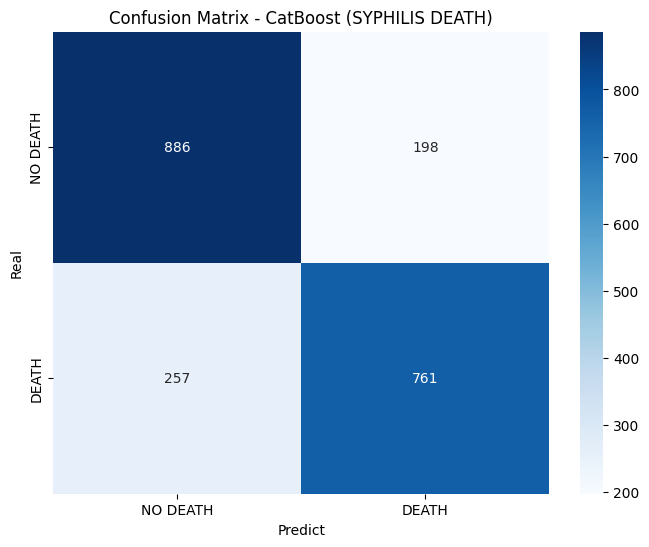

In [168]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_catboost = confusion_matrix(y_test, y_pred_catboost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=['NO DEATH', 'DEATH'], yticklabels=['NO DEATH', 'DEATH'])
plt.xlabel('Predict')
plt.ylabel('Real')
plt.title('Confusion Matrix - CatBoost (SYPHILIS DEATH)')
plt.show()

In [169]:
# Get Feature Importances in CatBoost
feature_importances = catboost_model.get_feature_importance(prettified=True)
print(feature_importances)

    Feature Id  Importances
0   TRA_ESQU_1    18.317115
1       HEPATO    11.974941
2   TRA_DIAG_T     9.482824
3       LESOES     8.470171
4   CLI_ANEMIA     6.712462
5    ANT_IDADE     6.591508
6   NU_IDADE_N     5.104172
7   ANT_TRATAD     4.237263
8   CS_GESTANT     3.739291
9   ANTSIFIL_N     3.650787
10  TRA_ESQUEM     3.543044
11  CLI_ICTERI     3.340884
12  ANT_PRE_NA     3.282004
13  CLI_RINITE     2.732851
14  CLI_PSEUDO     2.062720
15  CLI_ESPLEN     1.692587
16    ESCOLMAE     1.598625
17    ANT_RACA     1.390199
18     CS_RACA     0.963097
19   CLI_OSTEO     0.711446
20  CS_ESCOL_N     0.402008


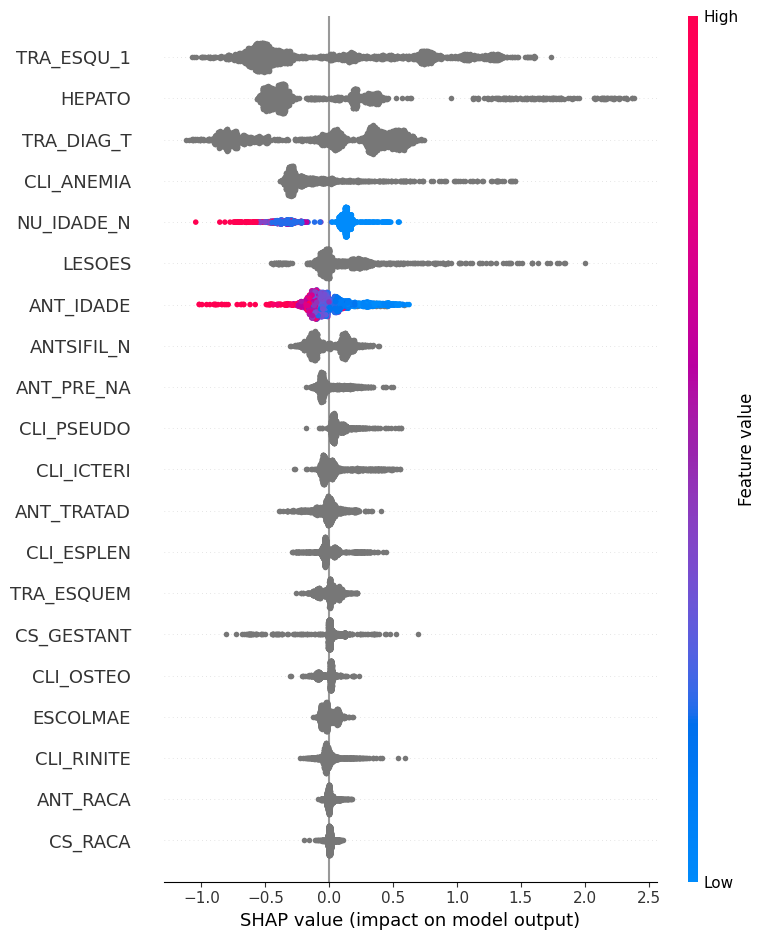

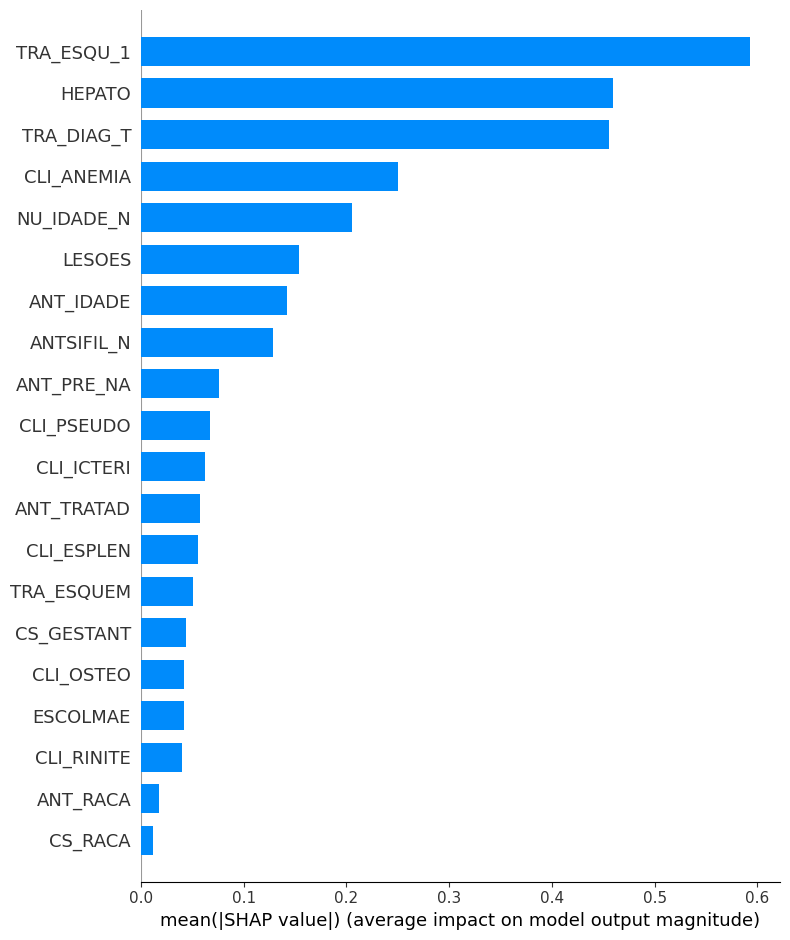

In [170]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(catboost_model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


# Random Forest

In [171]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [173]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Metrics for Syphilis DEATH SYPHILIS:")
print(classification_report(y_test, y_pred_rf))

Random Forest Metrics for Syphilis DEATH SYPHILIS:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1084
           1       0.78      0.75      0.77      1018

    accuracy                           0.78      2102
   macro avg       0.78      0.78      0.78      2102
weighted avg       0.78      0.78      0.78      2102



In [177]:
feature_importances_rf = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importance of features in the Random Forest model:")
print(feature_importances_rf)

Importance of features in the Random Forest model:
       Feature  Importance
4    ANT_IDADE    0.158008
12  TRA_ESQU_1    0.135771
6     ESCOLMAE    0.087725
11  TRA_DIAG_T    0.073721
0   NU_IDADE_N    0.049182
2      CS_RACA    0.047011
5     ANT_RACA    0.045614
17      HEPATO    0.045121
9   TRA_ESQUEM    0.044611
15  CLI_ANEMIA    0.043753
8   ANTSIFIL_N    0.042932
10  ANT_TRATAD    0.042445
16  CLI_ESPLEN    0.035466
19      LESOES    0.028858
7   ANT_PRE_NA    0.027588
18   CLI_OSTEO    0.023138
20  CLI_PSEUDO    0.022463
13  CLI_ICTERI    0.020463
14  CLI_RINITE    0.014271
1   CS_GESTANT    0.011556
3   CS_ESCOL_N    0.000302


SVM

In [ ]:
svm_model = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'), 
    StandardScaler(),
    SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Acuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Acuracy: 0.7264509990485252

Confusion Matrix:
 [[846 238]
 [337 681]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      1084
           1       0.74      0.67      0.70      1018

    accuracy                           0.73      2102
   macro avg       0.73      0.72      0.72      2102
weighted avg       0.73      0.73      0.73      2102



In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_model = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    StandardScaler(),
    SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)  
)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Acuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


svc = svm_model.named_steps['svc']

X_train_proc = svm_model.named_steps['standardscaler'].transform(
    svm_model.named_steps['simpleimputer'].transform(X_train)
)
X_test_proc = svm_model.named_steps['standardscaler'].transform(
    svm_model.named_steps['simpleimputer'].transform(X_test)
)

explainer = shap.KernelExplainer(svc.predict_proba, shap.sample(X_train_proc, 100))  
shap_values = explainer.shap_values(shap.sample(X_test_proc, 100))  


plt.title("Variable Importances - SHAP (SVM)")
shap.summary_plot(shap_values, shap.sample(X_test_proc, 100), feature_names=X_resampled.columns)


Acuracy: 0.79686013320647

Confusion Matrix:
 [[935 149]
 [278 740]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      1084
           1       0.83      0.73      0.78      1018

    accuracy                           0.80      2102
   macro avg       0.80      0.79      0.80      2102
weighted avg       0.80      0.80      0.80      2102



  1%|          | 1/100 [02:54<4:47:54, 174.49s/it]


KeyboardInterrupt: 

XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

xgb_model = make_pipeline(
    StandardScaler(),  
    XGBClassifier(
        n_estimators=200,        
        learning_rate=0.1,       
        max_depth=3,             
        subsample=0.8,           
        colsample_bytree=0.8,    
        random_state=42,
        use_label_encoder=False, 
        eval_metric='logloss'    
    )
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


print("Acuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Acuracy: 0.8158896289248335

Confusion Matrix:
 [[942 142]
 [245 773]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1084
           1       0.84      0.76      0.80      1018

    accuracy                           0.82      2102
   macro avg       0.82      0.81      0.81      2102
weighted avg       0.82      0.82      0.82      2102



c:\Users\natal\Github\Death-Prediction-Analysis-Congenital-Syphilis\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:20:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Com gridsearch

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

pipeline = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
)

param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)


print("Acuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\natal\Github\Death-Prediction-Analysis-Congenital-Syphilis\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:39:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhores parâmetros encontrados:
{'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__subsample': 1.0}
Acuracy: 0.8154138915318744

Confusion Matrix:
 [[945 139]
 [249 769]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1084
           1       0.85      0.76      0.80      1018

    accuracy                           0.82      2102
   macro avg       0.82      0.81      0.81      2102
weighted avg       0.82      0.82      0.81      2102



          Variable  Importance
84      HEPATO_2.0    0.154540
66    TRA_ESQU_1_5    0.095200
59  TRA_DIAG_T_2.0    0.065256
80  CLI_ESPLEN_2.0    0.062724
72  CLI_RINITE_2.0    0.046766
76  CLI_ANEMIA_2.0    0.045984
2           ABORTO    0.045867
92      LESOES_2.0    0.041645
3        NATIMORTO    0.033789
60  TRA_DIAG_T_3.0    0.033555
71  CLI_ICTERI_nan    0.028486
96  CLI_PSEUDO_2.0    0.028070
79  CLI_ANEMIA_nan    0.026809
50    ANTSIFIL_N_2    0.020308
73  CLI_RINITE_3.0    0.017247


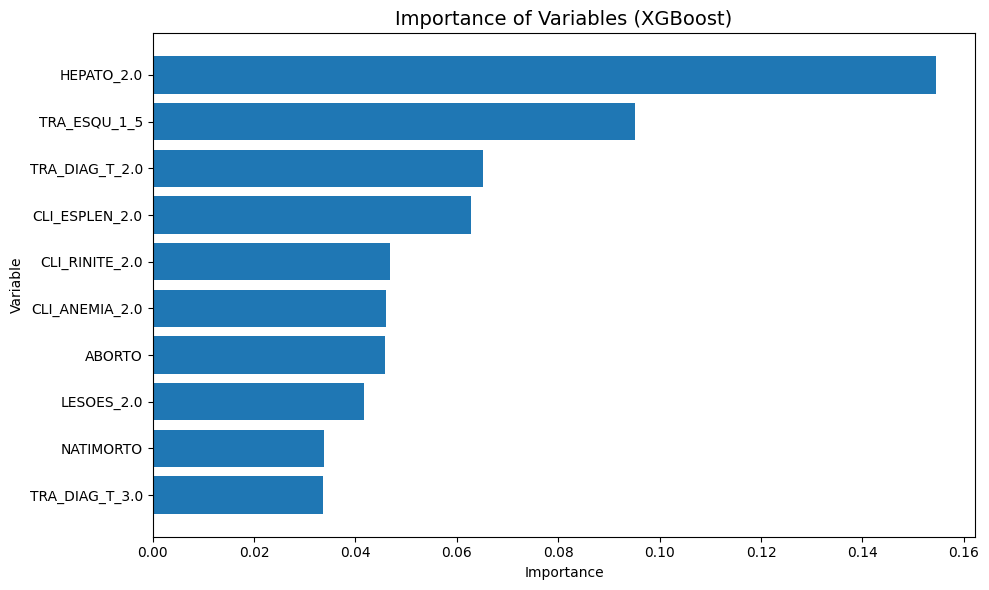

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


xgb_final = best_model.named_steps['xgbclassifier']


importances = xgb_final.feature_importances_
feature_names = X_resampled.columns


importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(importance_df.head(15))


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'].head(10), importance_df['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Importance of Variables (XGBoost)', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [98]:
from tabulate import tabulate

def calc_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "F1-score": f1_score(y_true, y_pred, average="weighted", zero_division=0)
    }

results = []

results.append(calc_metrics(y_test, y_pred_catboost, "CatBoost"))
results.append(calc_metrics(y_test, y_pred_rf, "Random Forest"))
results.append(calc_metrics(y_test, y_pred_svm, "SVM (RBF)"))
results.append(calc_metrics(y_test, y_pred_xgb, "XGBoost"))


df_results = pd.DataFrame(results).round(3)
df_results = df_results.sort_values(by="F1-score", ascending=False).reset_index(drop=True)

print("\nModel Performance Comparison:\n")
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid", showindex=False))


Model Performance Comparison:

╒═══════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model         │   Accuracy │   Precision │   Recall │   F1-score │
╞═══════════════╪════════════╪═════════════╪══════════╪════════════╡
│ XGBoost       │      0.815 │       0.818 │    0.815 │      0.815 │
├───────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest │      0.811 │       0.812 │    0.811 │      0.81  │
├───────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM (RBF)     │      0.797 │       0.801 │    0.797 │      0.796 │
├───────────────┼────────────┼─────────────┼──────────┼────────────┤
│ CatBoost      │      0.784 │       0.784 │    0.784 │      0.783 │
╘═══════════════╧════════════╧═════════════╧══════════╧════════════╛
